In [1]:
%matplotlib inline
from mpl_toolkits import mplot3d #引入绘制３维图像的库
import numpy as np  #引入科学计算的numpy
import torch   #引入深度学习框架
# import torchvision
import matplotlib.pyplot as plt #引入２维空间绘图信息

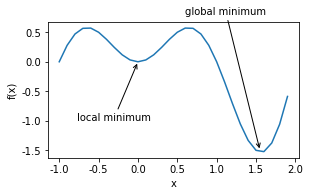

In [2]:
def f(x):
    return x * np.sin(np.pi * x)
# seaborn.set_figsize((4.5, 2.5))
plt.rcParams['figure.figsize'] = (4.5, 2.5) #设置绘图的图像大小
x = np.arange(-1.0, 2.0, 0.1) #定义X的变化范围
fig,  = plt.plot(x, f(x)) #绘制正弦图像在fig上，fig为句柄
fig.axes.annotate('local minimum', xy=(-0.0, -0.0), xytext=(-0.77, -1.0),
                  arrowprops=dict(arrowstyle='->'))
#axes.annotate：注释文本的内容Axes.annotate(s, xy, *args, **kwargs)
#xy：被注释的坐标点，二维元组形如(x,y)
#xytext：注释文本的坐标点，也是二维元组，默认与xy相同
#xycoords：被注释点的坐标系属性，允许输入的值如下
fig.axes.annotate('global minimum', xy=(1.55, -1.5), xytext=(0.6, 0.8),
                  arrowprops=dict(arrowstyle='->'))
# plt.rcParams['font.sans-serif']=['SimHei'] #显x示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.xlabel('x')#显示x轴坐标标签
plt.ylabel('f(x)')#显示y轴坐标标签
plt.show()#显示图像

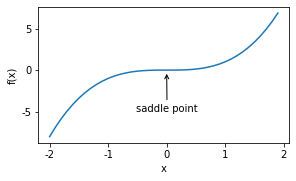

In [3]:
x = np.arange(-2.0, 2.0, 0.1)#定义X的变化范围
fig, = plt.plot(x, x**3)#绘制X＾３的曲线
fig.axes.annotate('saddle point', xy=(0, -0.2), xytext=(-0.52, -5.0),
                  arrowprops=dict(arrowstyle='->'))#图像标注
# plt.rcParams['font.sans-serif']=['SimHei']#显示中文
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号
plt.xlabel('x')#显示x轴坐标标签
plt.ylabel('f(x)')#显示y轴坐标标签
plt.show()#显示图像

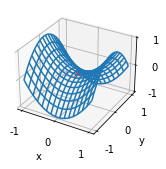

In [4]:
# plt.rcParams['font.sans-serif']=['SimHei']#显示中文
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号
x, y = np.mgrid[-1: 1: 31j, -1: 1: 31j]#返回多维结构，cj表示步长，为复数表示点数，左闭右闭
z = x**2 - y**2
ax = plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 2, 'cstride': 2})#绘制3D图像线图
ax.plot([0], [0], [0], 'rx')
ticks = [-1,  0, 1]
plt.xticks(ticks)
plt.yticks(ticks)
ax.set_zticks(ticks)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
eta = 0.1
def f_2d(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

In [6]:
def gd_2d(x1, x2, s1, s2):#x1与x2参数学习过程
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)

In [7]:
def show_trace_2d(f, results):
    #results是一个列表，每个元素为一个ｔｕｐｌｔ,
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    #zip返回的是一个迭代器，上述过程ｒｅｓｕｌｔｓ所有元素构成的
    # plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    #np.meshgrid(x,y),x和y为列表，x,y的尺度是一致的，均为第二个的len为行，第一个len为列
    # 取值时第一个取值每一行均为第一个原来的值，第二个取值每列的取值为第二个的原来的值
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    #contour和contourf都是画三维等高线图的，不同点在于contour() 是绘制轮廓线，contourf()会填充轮廓
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

In [8]:
def train_2d(trainer):
    x1, x2, s1, s2 = -5, -2, 0, 0  # s1和s2是自变量状态
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)#trainer为fun，即为一个函数，函数为有四个输入参数
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

epoch 20, x1 -0.074022, x2 -0.180437


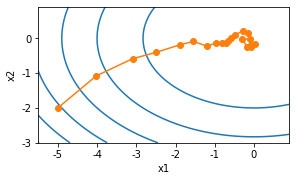

In [9]:
def sgd_2d(x1, x2, s1, s2):#x1和x2进行值调整
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)),
            x2 - eta * (4 * x2 + np.random.normal(0.1)), 0, 0)
show_trace_2d(f_2d, train_2d(sgd_2d))